In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

# Import csv file

In [2]:
a=pd.read_csv("Cars93.csv")

In [3]:
a.head(3)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


# Analysis of dataset

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

according to question we have to select our dependent(target) and indepenent features 

In [5]:
x=a.drop(labels=["id","Min.Price","Price","Max.Price"],axis=1)
y=a[["Price"]]

In [6]:
x.isna().sum()

Manufacturer           0
Model                  0
Type                   0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

we have fill the missing values with means and modes

In [7]:
x=x.interpolate()

In [8]:
x.isna().sum()

Manufacturer          0
Model                 0
Type                  0
MPG.city              0
MPG.highway           0
AirBags               4
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [9]:
x.isnull().values.any()

True

In [10]:
p=pd.DataFrame(x.isna().sum(),columns=["ct"])

In [11]:
p[p.ct>0]

,ct
AirBags,4


In [12]:
x.AirBags.dtypes

dtype('O')

it has datatype "object" so we will find mode of it and fill the blank spaces with it.

In [13]:
replacer=x["AirBags"].mode()[0]

In [14]:
x["AirBags"]=x["AirBags"].fillna(replacer)

In [15]:
x.isna().sum()

Manufacturer          0
Model                 0
Type                  0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [16]:
x.isnull().values.any()

False

Now we have cleaned and maneged data to perform our work.

# EDA

we have to find out the categorical and contineous columns

In [17]:
cat=[]
con=[]
for i in x:
    if x[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [18]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [19]:
con

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [20]:
y.head(2) # target is contineuos

,Price
0,15.9
1,33.9


cat to con

In [21]:
import warnings
warnings.filterwarnings('ignore')

# univariate 

categorical

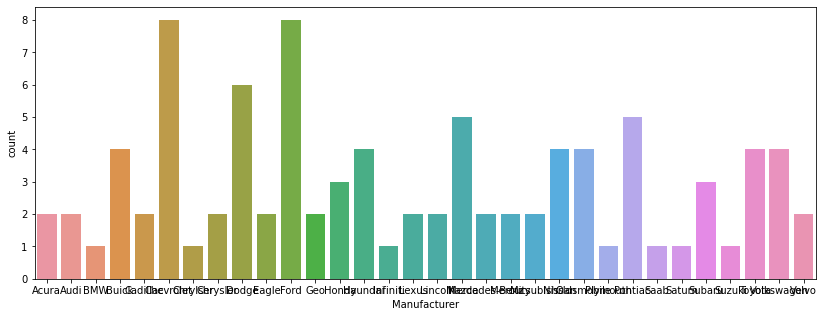

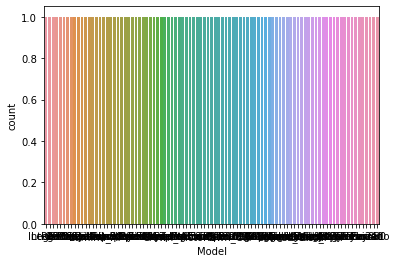

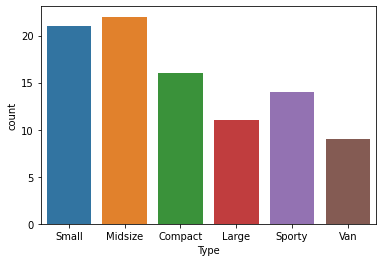

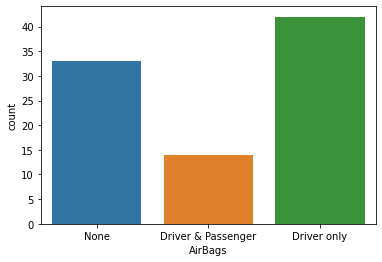

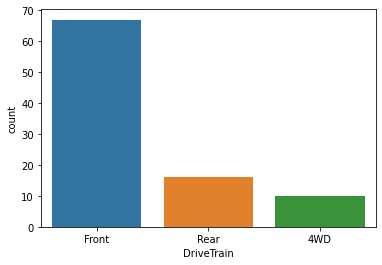

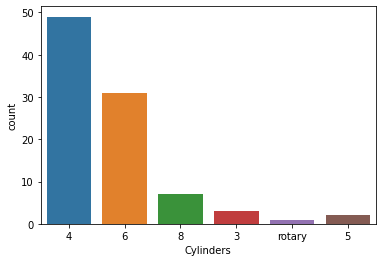

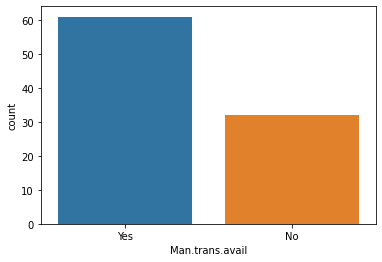

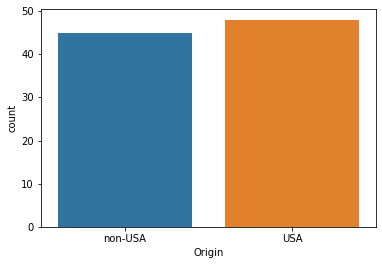

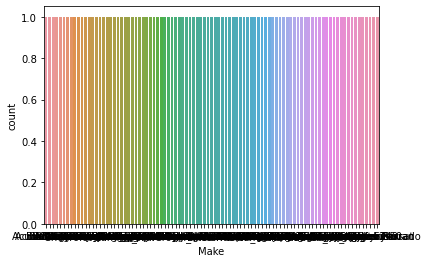

In [22]:
plt.figure(figsize=(14,5))
for i in cat:
    sb.countplot(a[i])
    plt.show()


univariate contineous

<Figure size 1008x360 with 0 Axes>

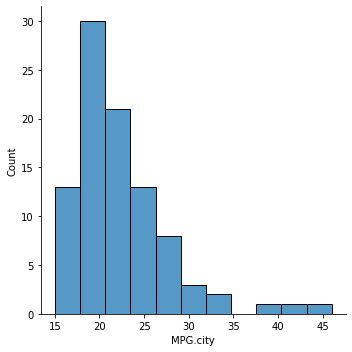

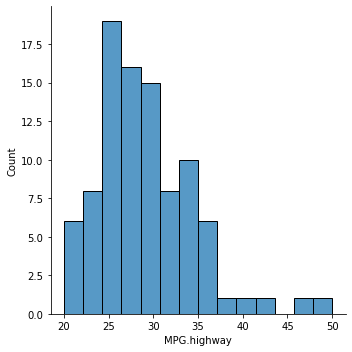

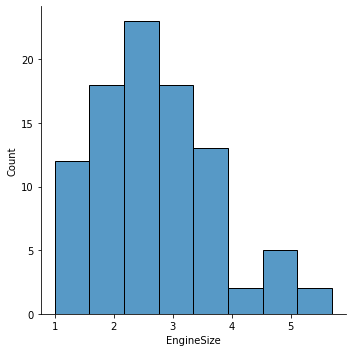

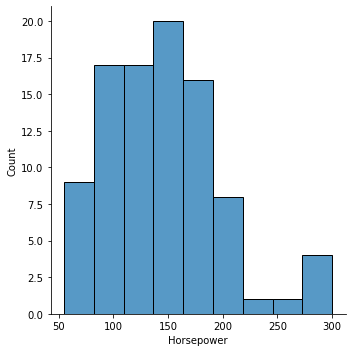

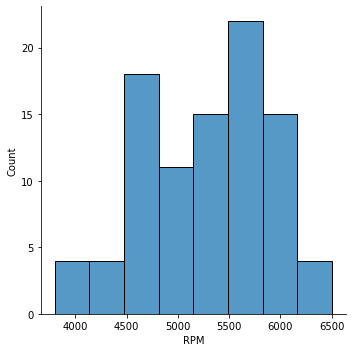

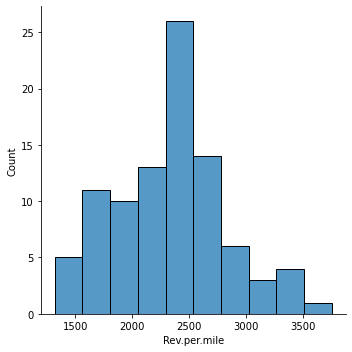

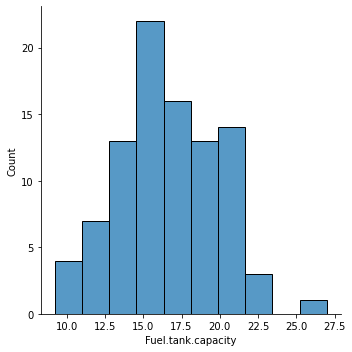

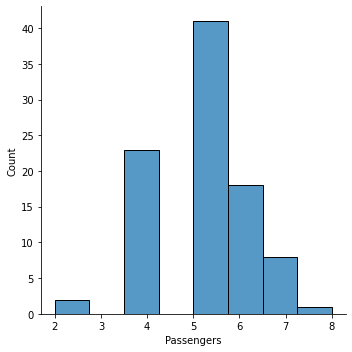

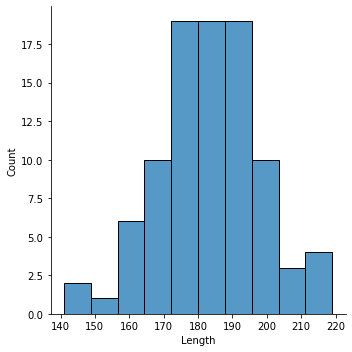

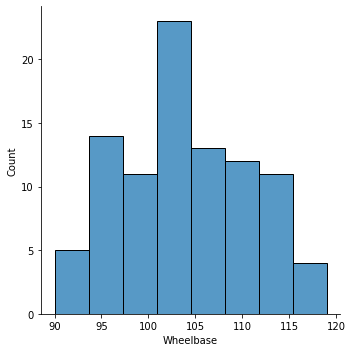

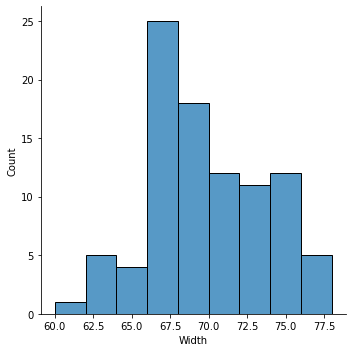

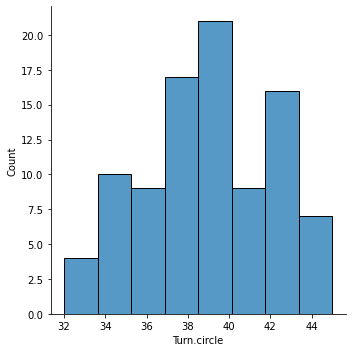

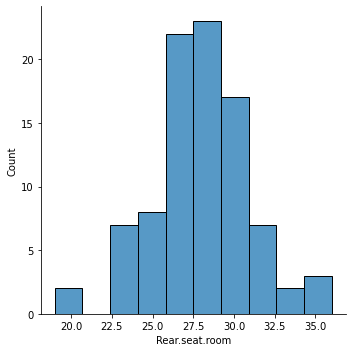

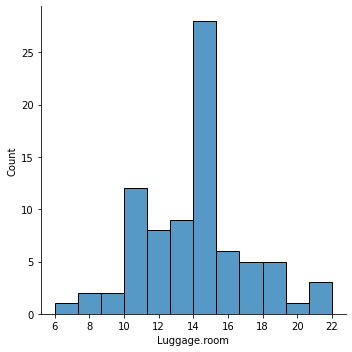

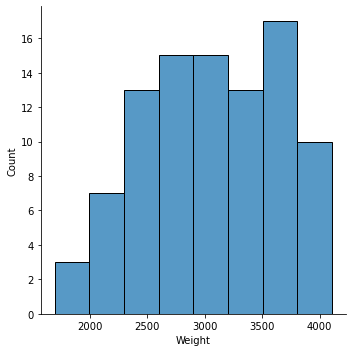

In [23]:
plt.figure(figsize=(14,5))
for i in con:
    sb.displot(a[i])
    plt.show()

# bivariate

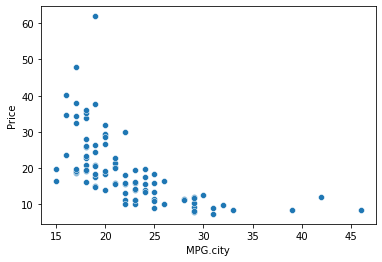

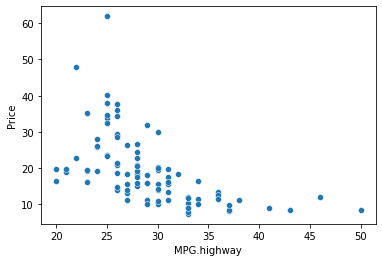

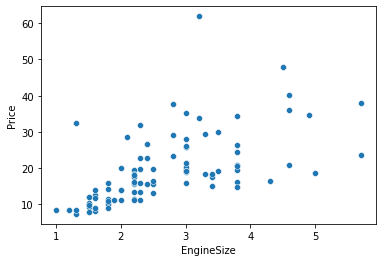

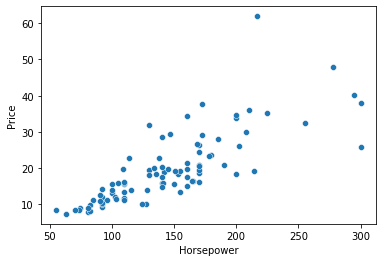

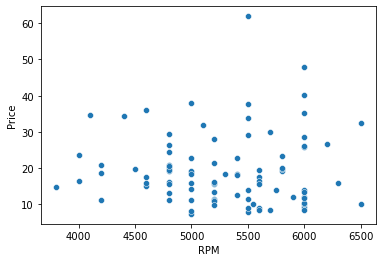

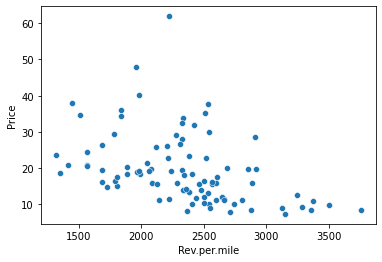

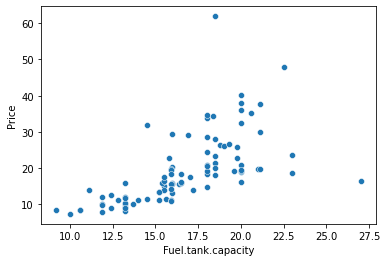

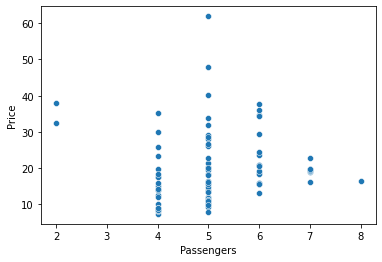

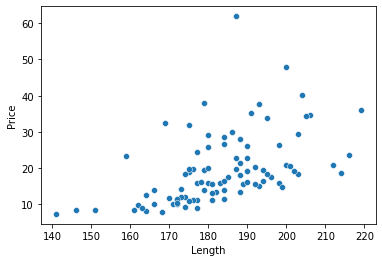

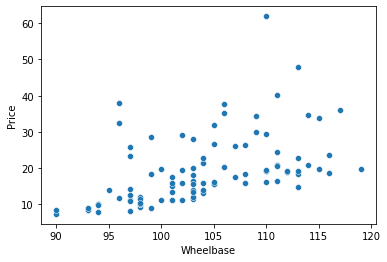

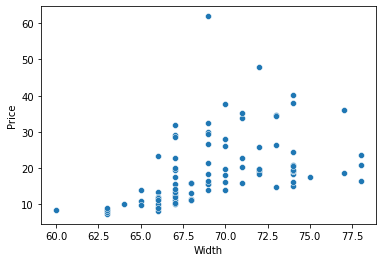

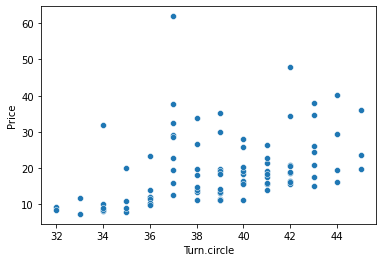

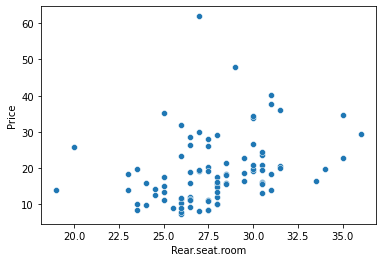

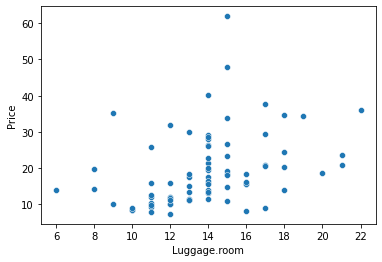

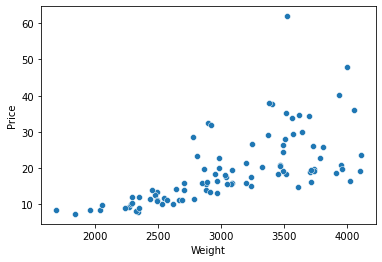

In [24]:
for i in con:
    sb.scatterplot(a[i],a.Price)
    plt.show()

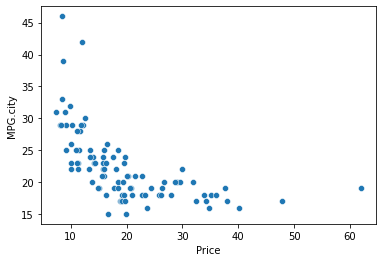

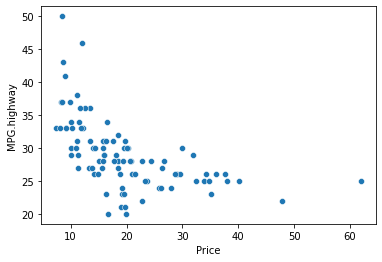

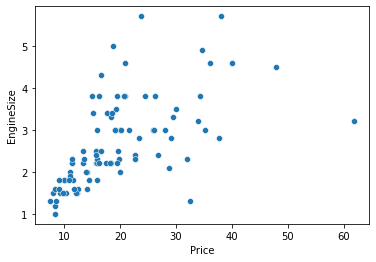

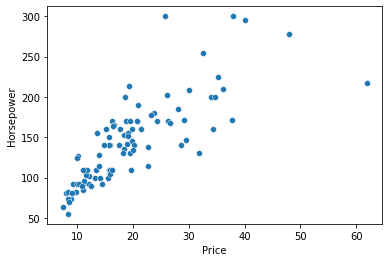

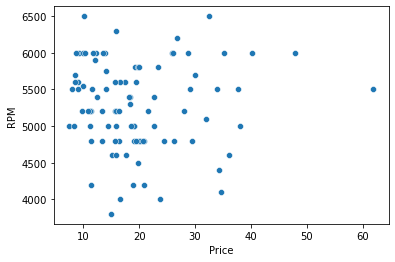

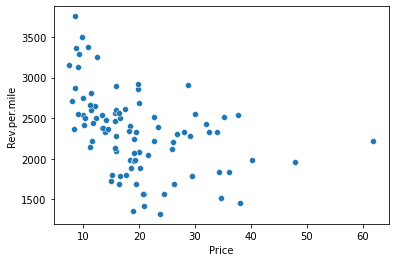

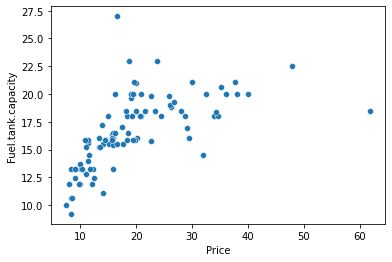

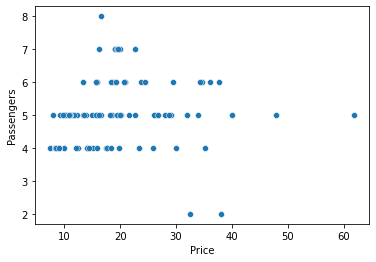

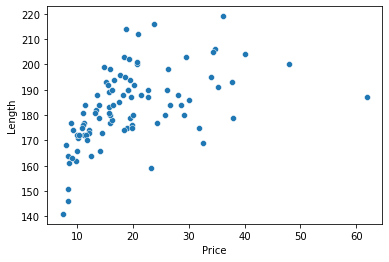

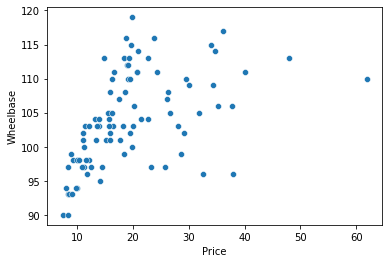

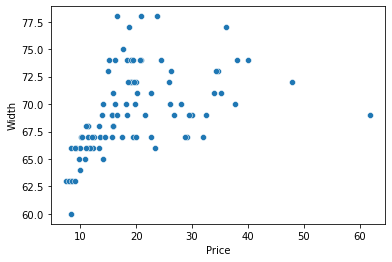

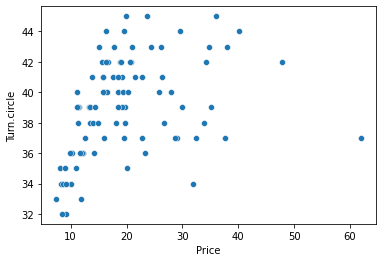

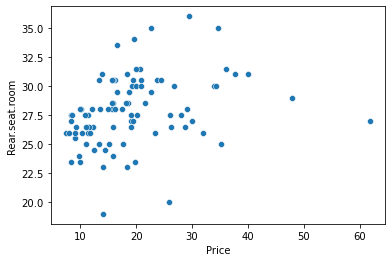

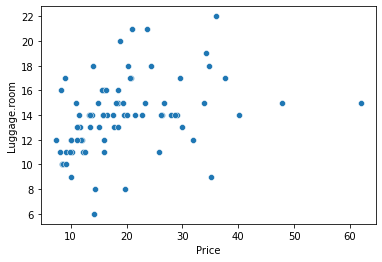

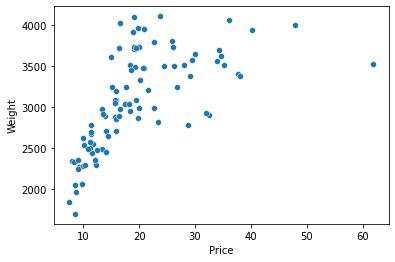

In [25]:
for i in con:
    sb.scatterplot(a.Price,a[i])
    plt.show()

<AxesSubplot:>

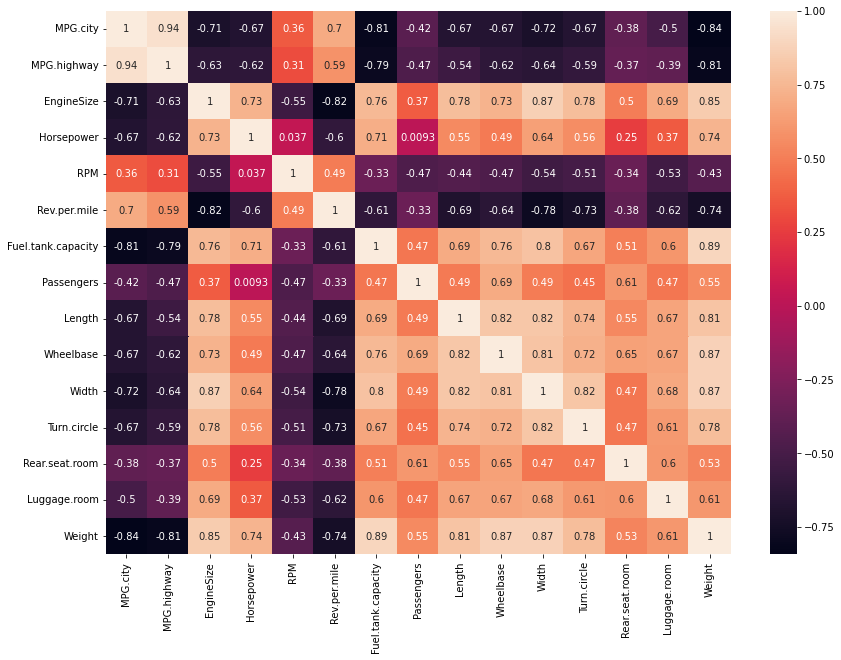

In [26]:
plt.figure(figsize=(14,10))
sb.heatmap(x.corr(),annot=True)

# Feature scalling

For contineous

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [28]:
x1=pd.DataFrame(ss.fit_transform(x[con]),columns=con)

In [29]:
x1.head(2)

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.455122,-1.035715,-0.627055
1,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.730015,0.323318,0.830208


For categorical

In [30]:
x2=pd.get_dummies(x[cat])

In [31]:
x2.head(2)

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x=x1.join(x2)

In [33]:
x.head(2)

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,...,0,0,0,0,0,0,0,0,0,0
1,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y.head(2)

,Price
0,15.9
1,33.9


splitting data into train and test

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Make models

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
pred_test=model.predict(xtest)
pred_train=model.predict(xtrain)

Errors

In [37]:
from sklearn.metrics import mean_absolute_error,r2_score
print("test_mean_absolute_error:")
print(round(mean_absolute_error(ytest,pred_test),2))
print("train_mean_absolute_error:")
print(round(mean_absolute_error(ytrain,pred_train),2))

print("r2_score")
print(round(r2_score(ytest,pred_test),2))

test_mean_absolute_error:
3.13
train_mean_absolute_error:
0.0
r2_score
0.79


In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [39]:
z=[lr,dtr,rfr]

In [40]:
for i in z:
    model=i.fit(xtrain,ytrain)
    pred_test=model.predict(xtest)
    print(i)
    from sklearn.metrics import mean_absolute_error,r2_score
    
    g=mean_absolute_error(ytest,pred_test)
    print("mean_absolute_error:%.2F"%g)
   # print("train_mean_absolute_error:")
   # print(round(mean_absolute_error(ytrain,pred_train),2))

    
    j=r2_score(ytest,pred_test)
    print("r2_score:%.2f"%j)
    print("----------------------------------------")

LinearRegression()
mean_absolute_error:3.13
r2_score:0.79
----------------------------------------
DecisionTreeRegressor()
mean_absolute_error:4.08
r2_score:0.55
----------------------------------------
RandomForestRegressor()
mean_absolute_error:2.95
r2_score:0.70
----------------------------------------


Best possible score is 1.0 and it can be negative

# Tuning the models

decision tree regressor

In [64]:
for i in range(0,20,1):
    dtr=DecisionTreeRegressor(criterion='mse',random_state=17)
    model1=dtr.fit(xtrain,ytrain)
    pred1=model1.predict(xtest)
    t=r2_score(ytest,pred1)
    print("random_state:%.2f"%i)
    print("r2_score:%.2f"%t)
    print("----------------------")

random_state:0.00
r2_score:0.62
----------------------
random_state:1.00
r2_score:0.56
----------------------
random_state:2.00
r2_score:0.57
----------------------
random_state:3.00
r2_score:0.61
----------------------
random_state:4.00
r2_score:0.57
----------------------
random_state:5.00
r2_score:0.57
----------------------
random_state:6.00
r2_score:0.50
----------------------
random_state:7.00
r2_score:0.61
----------------------
random_state:8.00
r2_score:0.59
----------------------
random_state:9.00
r2_score:0.51
----------------------
random_state:10.00
r2_score:0.26
----------------------
random_state:11.00
r2_score:0.50
----------------------
random_state:12.00
r2_score:0.52
----------------------
random_state:13.00
r2_score:0.46
----------------------
random_state:14.00
r2_score:0.51
----------------------
random_state:15.00
r2_score:0.55
----------------------
random_state:16.00
r2_score:0.61
----------------------
random_state:17.00
r2_score:0.68
----------------------
ra

In [67]:
for i in range(1,20,1):
    dtr=DecisionTreeRegressor(criterion='mse',max_depth=i,random_state=17)
    model1=dtr.fit(xtrain,ytrain)
    pred1=model1.predict(xtest)
    t=r2_score(ytest,pred1)
    print("max_depth:%.2f"%i)
    print("r2_score:%.2f"%t)
    print("----------------------")

max_depth:1.00
r2_score:0.44
----------------------
max_depth:2.00
r2_score:0.52
----------------------
max_depth:3.00
r2_score:0.51
----------------------
max_depth:4.00
r2_score:0.65
----------------------
max_depth:5.00
r2_score:0.15
----------------------
max_depth:6.00
r2_score:0.55
----------------------
max_depth:7.00
r2_score:0.52
----------------------
max_depth:8.00
r2_score:0.52
----------------------
max_depth:9.00
r2_score:0.52
----------------------
max_depth:10.00
r2_score:0.52
----------------------
max_depth:11.00
r2_score:0.65
----------------------
max_depth:12.00
r2_score:0.61
----------------------
max_depth:13.00
r2_score:0.53
----------------------
max_depth:14.00
r2_score:0.68
----------------------
max_depth:15.00
r2_score:0.68
----------------------
max_depth:16.00
r2_score:0.68
----------------------
max_depth:17.00
r2_score:0.68
----------------------
max_depth:18.00
r2_score:0.68
----------------------
max_depth:19.00
r2_score:0.68
----------------------


max_depth=14 random state=17 min_samples_leaf=1 best accuracy= 68%

In [69]:
for i in range(1,20,1):
    dtr=DecisionTreeRegressor(criterion='mse',max_depth=14,min_samples_leaf=1,random_state=17)
    model1=dtr.fit(xtrain,ytrain)
    pred1=model1.predict(xtest)
    t=r2_score(ytest,pred1)
    print("max_depth:%.2f"%i)
    print("r2_score:%.2f"%t)
    print("----------------------")

max_depth:1.00
r2_score:0.68
----------------------
max_depth:2.00
r2_score:0.68
----------------------
max_depth:3.00
r2_score:0.68
----------------------
max_depth:4.00
r2_score:0.68
----------------------
max_depth:5.00
r2_score:0.68
----------------------
max_depth:6.00
r2_score:0.68
----------------------
max_depth:7.00
r2_score:0.68
----------------------
max_depth:8.00
r2_score:0.68
----------------------
max_depth:9.00
r2_score:0.68
----------------------
max_depth:10.00
r2_score:0.68
----------------------
max_depth:11.00
r2_score:0.68
----------------------
max_depth:12.00
r2_score:0.68
----------------------
max_depth:13.00
r2_score:0.68
----------------------
max_depth:14.00
r2_score:0.68
----------------------
max_depth:15.00
r2_score:0.68
----------------------
max_depth:16.00
r2_score:0.68
----------------------
max_depth:17.00
r2_score:0.68
----------------------
max_depth:18.00
r2_score:0.68
----------------------
max_depth:19.00
r2_score:0.68
----------------------


# Conclusion

we have best result with Linear Regression 